<h1>Assignment 2</h1>
<h3>Juan Camilo Castro Pinto</h3>
<h3>Andres Felipe Cantor</h3>
<br/>

### 1.

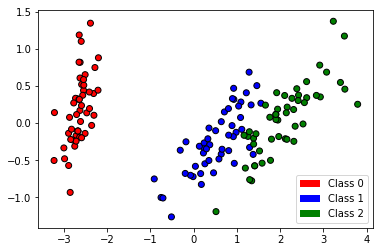

In [323]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
colors = ["r", "b", "g", "w"]
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in colors]
plt.legend(proxy, ["Class 0", "Class 1", "Class 2"])
plt.show()

#Organize data into a dictionary for easier management
data = {}
data[0] = X[0:50,:] 
data[1] = X[50:100,:] 
data[2] = X[100:150,:] 



### (a)
</br>
## Parameter Estimation
Given $\mathcal{X} = \{x^{t} , r^{t}\}$ where $r_{i}^{t}=1$  if  $x^{t} \in C_{i}$ if you assume $p(x|C_{i}) \sim \mathcal{N}(\mu_{i},\Sigma_{i})$. Then you can estimate $\mu_{i}$ and $\Sigma_{i}$

$\hat{\mu}_{i}$ = $m_{i}$ = $\frac{\sum_{t}r_{i}^{t}x^{t}}{\sum_{t}r_{i}^{t}}$

$\hat{\Sigma_{i}}$ = $S_{i}$ = $\frac{\sum_{t}r_{i}^{t}(x^{t} - m_{i})(x^{t} - m_{i})^{T}}{\sum_{t}r_{i}^{t}}$

In [324]:
#Define a function to calculate parameters \mu and \sigma of a bivariate gaussian distribution of a class (c)
#with sample data (data)
#c: Number of class
#data: A dictionary with key the number class and value a matrix of data with shape (t, d)
#where t is the total of samples of the class and d the dimension (2 in this case)
def bivariate_gaussian_parameter_estimator(c, data, split = 1.0):
    m,n = data[c].shape
    data_i = data[c][0:int(m * split),:]    
    m_i = np.mean(data_i, axis=0)
    s_i = np.cov(data_i.T, bias=True)
    return m_i,s_i


m_1,s_1 = bivariate_gaussian_parameter_estimator(1, data)
print "Median vector and covariance matrix for class 1"
print m_1
print s_1
m_2,s_2 = bivariate_gaussian_parameter_estimator(2, data)
print "Median vector and covariance matrix for class 2"
print m_2
print s_2

Median vector and covariance matrix for class 1
[ 0.53199262 -0.24402963]
[[0.34899363 0.19443157]
 [0.19443157 0.18078976]]
Median vector and covariance matrix for class 2
[2.10884814 0.05350968]
[[0.48896484 0.26977165]
 [0.26977165 0.22766092]]


### (b)
<br/>
## Discrimant Functions

According to [Apl10] Eq. (5.22). If we assume a common covariance matrix with the form:

$S = \sum_{i}\hat{P}(C_{i})S_{i}$ With:

$\hat{P}(C_{i}) = \frac{\sum_{t}r_{i}^{t}}{N}$

Then the discriminant function for the class i is defined as:

$g_{i}(x) = -\frac{1}{2}(x - m_{i})^{T}S^{-1}(x-m_{i}) + log \hat{P}(C_{i})$


In [325]:
#Function to estimate the probability to select a class based on the data. P^(C_i)
#c: Number of class
#data: A dictionary with key the number class and value a matrix of data with shape (t, d)
#where t is the total of samples of the class and d the dimension (2 in this case)
def prob_estimator(c, data):
    data_i = data[c]
    m,n = data_i.shape
    count_i = 0.0
    for k in data:
        m_k, n_k = data[k].shape
        count_i += m_k        
    return m / count_i

In [326]:
#Function to calculate an unique covariance matrix to all classes
#data: A dictionary with key the number class and value a matrix of data with shape (t, d)
#where t is the total of samples of the class and d the dimension (2 in this case)
#S_i: A vector with the covariance matrix of each class
#C: A vector with classes to take in account
#P: A vector with the estimate probability of each class
def get_covariance(data, S_i, C, P):
    dim = S_i[0].shape
    S = np.zeros(dim)
    for i in range(len(C)):
        S += P[i] * S_i[i]
    return S


In [327]:
#Function to calculate the discriminant gi(x) of a new sample x for the class i 
#supposing a common covariance matrix for all the classes
#x: the new sample to be discriminate
#c: the class to discrimante with
#data: training data
#S: common covariance to all the classes
from numpy.linalg import inv
def discriminant_with_same_covariance(x, c, data, S):
    m_i,s_i = bivariate_gaussian_parameter_estimator(c, data)
    p_i = prob_estimator(c, data)        
    return (-1.0/2.0)*np.dot(np.dot((x - m_i).transpose(),inv(S)),(x - m_i)) + np.log(p_i)

### (c)

When the discriminant of a sample $X$ is maximum for the $i$ class, the sample $X$ belongs to the class $i$

$$choose = argmax_{i} g_{i}(X)$$

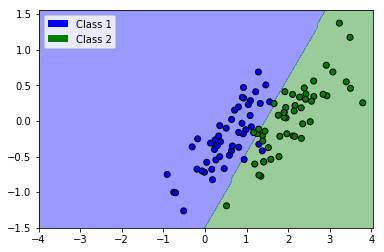

In [328]:
xx, yy = np.meshgrid(np.arange(-4.0, 4.1, 0.05),
                     np.arange(-1.5, 1.6, 0.05))

m,n = xx.shape
Z = np.zeros(xx.shape)
p_1 = prob_estimator(1, data)
p_2 = prob_estimator(2, data)
P = [p_1, p_2]
S_t = get_covariance(data,[s_1, s_2],[1,2], P)
da = np.ones(shape=(2))
for i in range(0,m):
    for j in range(0,n):
        da[0] = discriminant_with_same_covariance([xx[i,j], yy[i, j]],1, data, S_t)
        da[1] = discriminant_with_same_covariance([xx[i,j], yy[i, j]],2, data, S_t)
        Z[i,j] = np.argmax(da)

plt.contourf(xx, yy, Z, alpha=0.4, levels=[0,0.9,1.9], colors = ["b", "g"])
plt.scatter(X[50:, 0], X[50:, 1], marker='o', edgecolor='k', c=[colors[i] for i in y[50:]])
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in ["b","g"]]
plt.legend(proxy, ["Class 1", "Class 2"])
plt.show()


### (d)

The discriminant function for the class i is defined as:

$g_{i}(x) = -\frac{1}{2}(x - m_{i})^{T}S^{-1}(x-m_{i}) + log \hat{P}(C_{i})$

An expanded form:

$g_{i}(x) = -\frac{1}{2}(x^{T}S^{-1}x-2x^{T}S^{-1}m_{i} + m_{i}^{T}S^{-1}m_{i}) + log \hat{P}(C_{i})$

To classify a sample $x$ into a class, the next expression is neccessary:

$choose = argmax_{i} g_{i}(X)$

When there are two classes is possible to define a single discriminant as follows:

$g(x) = g_{1}(x) - g_{2}(x)$

$choose = \left\{
        \begin{array}{ll}
            C_{1} & \quad g(x)>0 \\
            C_{2} & \quad otherwise
        \end{array}
    \right.$

A boundary can be found if $g(x)=0$. Using the definition of discriminant function above $g_{i}(x)$, $g(x)$ can be expressed as follows:
$$g(x) = x^{T}S^{-1}m_{1} - x^{T}S^{-1}m_{2} + \frac{1}{2}(m_{2}^{T}S^{-1}m_{2} - m_{1}^{T}S^{-1}m_{1}) + log \hat{P}(C_{1}) - log \hat{P}(C_{2})$$

If $\begin{align}
    x &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\           
         \end{bmatrix}
  \end{align}$,  $\begin{align}
    S^{-1} &= \begin{bmatrix}
           s_{11} & s_{12}\\
           s_{21} & s_{22}\\           
         \end{bmatrix}
  \end{align}$ and $\begin{align}
    m_i &= \begin{bmatrix}
           m_{i1} \\
           m_{i2} \\           
         \end{bmatrix}
  \end{align}$, the term $x^{T}S^{-1}m_{1} - x^{T}S^{-1}m_{2}$ can be expressed as follows:

$$ m_{11}s_{11}x_{1} + m_{11}s_{21}x_{2} + m_{12}s_{12}x_{1} + m_{12}s_{22}x_{2} - m_{21}s_{11}x_{1} - m_{21}s_{21}x_{2} -m_{22}s_{12}x_{1} + m_{22}s_{22}x_{2}$$

Now group common terms of $x_{1}$ and $x_{2}$:

$$ x_{1} (m_{11}s_{11} + m_{12}s_{12} - m_{21}s_{11} - m_{22}s_{12}) + x_{2}(m_{11}s_{21} + m_{12}s_{22} - m_{21}s_{21} - m_{22}s_{22}) $$

With the next constants:

$k_{1} = m_{11}s_{11} + m_{12}s_{12} - m_{21}s_{11} - m_{22}s_{12}$

$k_{2} = m_{11}s_{21} + m_{12}s_{22} - m_{21}s_{21} - m_{22}s_{22}$

$k_{3} = \frac{1}{2}(m_{2}^{T}S^{-1}m_{2} - m_{1}^{T}S^{-1}m_{1}) + log \hat{P}(C_{1}) - log \hat{P}(C_{2})$

The discriminant function $g(x)$ will be defined like this:

$$ g(x) = k_{1}x_{1} + k_{2}x_{2} + k_{3}$$

To find the equation of the boundary $g(x)=0$, then a lineal relation between $x_{1}$ and $x_{2}$ can be found with the next expression:

$$b_e(x_{1}) = x_{2} = \frac{-k_{1}}{k_{2}}x_{1} +  \frac{-k_{3}}{k_{2}} $$ 

Where $b_e$ is the equation of the boundary, $m=\frac{-k_{1}}{k_{2}}$ as slope and the Y-Axis cross point is $b=\frac{-k_{3}}{k_{2}}$.

Slope: m= 1.048260488004789
Y-Axis cross: b= -1.4794044874168117


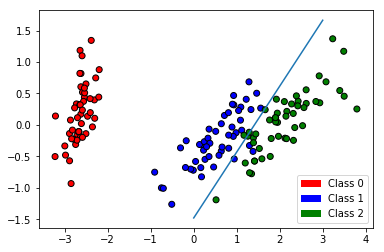

In [329]:
p_1 = prob_estimator(1, data)
p_2 = prob_estimator(2, data)
P = [p_1, p_2]
S_t = get_covariance(data,[s_1, s_2],[1,2], P)
S_t_inv = inv(S_t)
k1 = m_1[0] * S_t_inv[0,0] + m_1[1] * S_t_inv[0,1] - m_2[0] * S_t_inv[0,0] - m_2[1] * S_t_inv[0,1]
k2 = m_1[0] * S_t_inv[1,0] + m_1[1] * S_t_inv[1,1] - m_2[0] * S_t_inv[1,0] - m_2[1] * S_t_inv[1,1]
m = -k1/k2
k3 = (1.0/2.0) * (np.dot(np.dot(m_2.T,S_t_inv),m_2) - np.dot(np.dot(m_1.T,S_t_inv),m_1)) + np.log(p_1) - np.log(p_2)
b = -k3/k2
X_boundary = np.linspace(0,3,10)
Y_boundary= m*X_boundary + b

print "Slope: m=", m
print "Y-Axis cross: b=", b

plt.plot(X_boundary, Y_boundary)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in colors]
plt.legend(proxy, ["Class 0", "Class 1", "Class 2"])
plt.show()


### (e)

Line Boundary Equation:

$k_{1} = m_{11}s_{11} + m_{12}s_{12} - m_{21}s_{11} - m_{22}s_{12}$

$k_{2} = m_{11}s_{21} + m_{12}s_{22} - m_{21}s_{21} - m_{22}s_{22}$

$k_{3} = \frac{1}{2}(m_{2}^{T}S^{-1}m_{2} - m_{1}^{T}S^{-1}m_{1}) + log \hat{P}(C_{1}) - log \hat{P}(C_{2})$

$$b_e(x_{1}) = x_{2} = \frac{-k_{1}}{k_{2}}x_{1} +  \frac{-k_{3}}{k_{2}} $$

When $\hat{P}(C_{1}) > \hat{P}(C_{2})$ the constant $k3$ decrease its value, that means the line move down along the Y axis. That is the expected behavior, because if the $C_1$ has more probabilities to be choosen, the region of the class must be bigger.

The same happens when $\hat{P}(C_{2}) > \hat{P}(C_{1})$. The constant $k3$ increase its value, that means the line move up along the Y axis. In this case the choosen region of $C_2$ must be bigger.

The behavior of the boundary line is showed using the next implementation.

First compute the boundary line when $\hat{P}(C_{2}) > \hat{P}(C_{1})$ using the next values:

$\hat{P}(C_{1}) = 0.1$

$\hat{P}(C_{2}) = 0.9$

In [330]:
p_1 = 0.1
p_2 = 0.9
P = [p_1, p_2]
S_t = get_covariance(data,[s_1, s_2],[1,2], P)
S_t_inv = inv(S_t)
k1 = m_1[0] * S_t_inv[0,0] + m_1[1] * S_t_inv[0,1] - m_2[0] * S_t_inv[0,0] - m_2[1] * S_t_inv[0,1]
k2 = m_1[0] * S_t_inv[1,0] + m_1[1] * S_t_inv[1,1] - m_2[0] * S_t_inv[1,0] - m_2[1] * S_t_inv[1,1]
m = -k1/k2
k3 = (1.0/2.0) * (np.dot(np.dot(m_2.T,S_t_inv),m_2) - np.dot(np.dot(m_1.T,S_t_inv),m_1)) + np.log(p_1) - np.log(p_2)
b = -k3/k2
X_boundary_2g1 = np.linspace(0,3,10)
Y_boundary_2g1= m*X_boundary_2g1 + b

Then compute the boundary line when $\hat{P}(C_{1}) > \hat{P}(C_{2})$ using the next values:

$\hat{P}(C_{1}) = 0.9$

$\hat{P}(C_{2}) = 0.1$

In [331]:
p_1 = 0.9
p_2 = 0.1
P = [p_1, p_2]
S_t = get_covariance(data,[s_1, s_2],[1,2], P)
S_t_inv = inv(S_t)
k1 = m_1[0] * S_t_inv[0,0] + m_1[1] * S_t_inv[0,1] - m_2[0] * S_t_inv[0,0] - m_2[1] * S_t_inv[0,1]
k2 = m_1[0] * S_t_inv[1,0] + m_1[1] * S_t_inv[1,1] - m_2[0] * S_t_inv[1,0] - m_2[1] * S_t_inv[1,1]
m = -k1/k2
k3 = (1.0/2.0) * (np.dot(np.dot(m_2.T,S_t_inv),m_2) - np.dot(np.dot(m_1.T,S_t_inv),m_1)) + np.log(p_1) - np.log(p_2)
b = -k3/k2
X_boundary_1g2 = np.linspace(0,3,10)
Y_boundary_1g2= m*X_boundary_1g2 + b

Finally, compare all boundary lines and see that the expected behavior is reached.

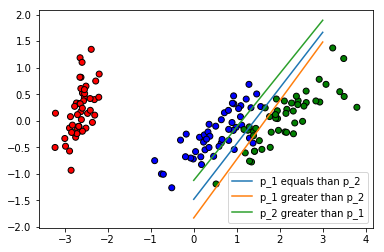

In [332]:
plt.plot(X_boundary, Y_boundary, label="p_1 equals than p_2")
plt.plot(X_boundary_1g2, Y_boundary_1g2, label="p_1 greater than p_2")
plt.plot(X_boundary_2g1, Y_boundary_2g1, label="p_2 greater than p_1")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
plt.legend()
plt.show()

$\textbf{2.}$ Repeat Steps (a) to (c) from previous item, but this time:
    
(a) Use data from the three classes
    
(b) Estimate a different covariance matrix for each class

### (a) 

Parameter estimation does not change with the new assumptions.

In [333]:
m_0,s_0 = bivariate_gaussian_parameter_estimator(0, data)
print "Median vector and covariance matrix for class 0"
print m_0
print s_0
m_1,s_1 = bivariate_gaussian_parameter_estimator(1, data)
print "Median vector and covariance matrix for class 1"
print m_1
print s_1
m_2,s_2 = bivariate_gaussian_parameter_estimator(2, data)
print "Median vector and covariance matrix for class 2"
print m_2
print s_2
 

Median vector and covariance matrix for class 0
[-2.64084076  0.19051995]
[[0.04777048 0.05590782]
 [0.05590782 0.21472356]]
Median vector and covariance matrix for class 1
[ 0.53199262 -0.24402963]
[[0.34899363 0.19443157]
 [0.19443157 0.18078976]]
Median vector and covariance matrix for class 2
[2.10884814 0.05350968]
[[0.48896484 0.26977165]
 [0.26977165 0.22766092]]


### (b) 

If we do not assume the same covariance for all the classes then according to ([Alp10] Eq. (5.20)) we can write the discriminant function as:

$g_{i}(x) = x^{T}W_{i}x + w_{i}^{T}x + w_{i0}$

Where:

$ W_{i} =  -\frac{1}{2}S_{i}^{-1}$

$ w_{i} = S_{i}^{-1}m_{i}$

$ w_{i0} = -\frac{1}{2}m_{i}^{T}S_{i}^{-1}m_{i} -\frac{1}{2}\log{\lvert S_{i} \rvert} + \log{\hat{P}(C_{i})}$

In [334]:
#Function to calculate the discriminant gi(x) of a new sample x for the class i
#without any assumption about the covariance matrix
#x: the new sample to be discriminate
#c: the class to discrimante with
#data: training data
#split: a number between 0.0 - 1.0 telling how much of the data will be used for training
from numpy.linalg import norm
def discriminant_diff_covariance(x, c, data, p, params):           
    m_i,s_i = params    
    x = np.reshape(x, (2,1))
    m_i = np.reshape(m_i, (2,1))
    W_i = (-1.0/2.0)*inv(s_i)
    w_i = np.dot(inv(s_i), m_i)
    w_i0 = (-1.0/2.0)*(np.dot(np.dot(m_i.T,inv(s_i)),m_i)) - (1.0/2.0)*(np.log(np.linalg.det(s_i))) + np.log(p)    
    return np.dot(np.dot(x.T,W_i),x) + np.dot(w_i.T,x) + w_i0

### (c)



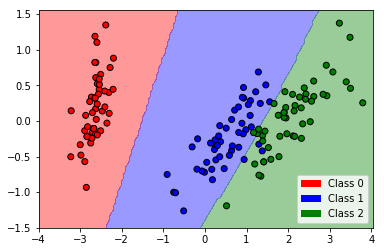

In [335]:
xx, yy = np.meshgrid(np.arange(-4.0, 4.1, 0.05),
                     np.arange(-1.5, 1.6, 0.05))

m,n = xx.shape
Z = np.zeros(xx.shape)
da = np.ones(shape=(3))
params0 = bivariate_gaussian_parameter_estimator(0, data)
params1 = bivariate_gaussian_parameter_estimator(1, data)
params2 = bivariate_gaussian_parameter_estimator(2, data)
p_0 = prob_estimator(0, data)
p_1 = prob_estimator(1, data)
p_2 = prob_estimator(2, data)



for i in range(0,m):
    for j in range(0,n):
        da[0] = discriminant_diff_covariance([xx[i,j], yy[i, j]],0, data, p_0, params0)
        da[1] = discriminant_diff_covariance([xx[i,j], yy[i, j]],1, data, p_1, params1)
        da[2] = discriminant_diff_covariance([xx[i,j], yy[i, j]],2, data, p_2, params2)
        Z[i,j] = np.argmax(da)

plt.contourf(xx, yy, Z, alpha=0.4, levels = [0,0.9,1.9,2.9],  colors=("r","b","g"))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in colors]
plt.legend(proxy, ["Class 0", "Class 1", "Class 2"])
plt.show()

$\textbf{3.}$ Repeat Steps (a) to (c) from previous item, but this time:
    
### (a)
Use only a portion of the dataset (80% of the samples) to estimate the parameters of
the probability distribution functions of each class

In [336]:
params_0 = bivariate_gaussian_parameter_estimator(0, data, split = 0.8)
print "Median vector and covariance matrix for class 0 using 80% of data"
print params_0[0]
print params_0[1]

params_1 = bivariate_gaussian_parameter_estimator(1, data, split = 0.8)
print "Median vector and covariance matrix for class 1 using 80% of data"
print params_1[0]
print params_1[1]

params_2 = bivariate_gaussian_parameter_estimator(2, data, split = 0.8)
print "Median vector and covariance matrix for class 2 using 80% of data"
print params_2[0]
print params_2[1]

Median vector and covariance matrix for class 0 using 80% of data
[-2.63667216  0.22837741]
[[0.04717454 0.05182922]
 [0.05182922 0.21125022]]
Median vector and covariance matrix for class 1 using 80% of data
[ 0.61579271 -0.20004814]
[[0.32926788 0.19109369]
 [0.19109369 0.19298978]]
Median vector and covariance matrix for class 2 using 80% of data
[2.15709612 0.05887868]
[[0.56115373 0.31136064]
 [0.31136064 0.26031239]]


### (b)
Write a function that calculates the discriminant function for each class, taking into account the possibility of rejection with a cost λ and cost 1 for misclassification ([Alp10] Eq. (3.10)). Look for values of λ that produce a rejection region easily distinguishable from the other regions.

Using the next loss function:

$$\lambda_{ik} = \left\{
        \begin{array}{ll}
            0 & i=k \\
            \lambda & i = K + 1 \\
            1 & otherwise
        \end{array}
    \right.$$

And the definition of $P(C_i|x)$ as follows:

$$P(C_i|x)=\frac{P(x|C_i)P(C_i)}{P(x)}=\frac{P(x|C_i)P(C_i)}{\sum_{k=1}^{K}P(x|C_k)P(C_k)}$$

Where $P(x|C_{i}) \sim \mathcal{N}(\mu_{i},\Sigma_{i})$ and is defined with the next expression:

$$P(x|C_{i})=\frac{1}{(2\pi)^{d/2}|\Sigma_i|^{1/2}}exp\left[-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)\right]$$

An optimal decision rule can be found as follows:

$$decision=\left\{
        \begin{array}{ll}
            choose \ C_i & if\ P(C_i|x)>P(C_k|x)\ for\ all\ k \neq i\ and \\
            & P(C_i|x)>1-\lambda \\
            reject & otherwise
        \end{array}
    \right.$$


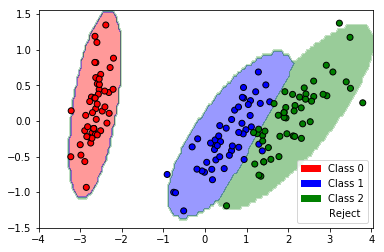

In [337]:
##Classificate using P(x|C_i)
#params is a vector with mean estimate and covariance matrix. Result of bivariate_gaussian_parameter_estimator function
#x point to be evaluated
def P_x_Ci(x,params):
    m_i,s_i = params
    k1 = 2*np.pi*(np.linalg.det(s_i)**(1.0/2.0))
    k2 = -(1.0/2.0) * np.dot(np.dot((x - m_i).T,inv(s_i)),(x - m_i))
    return (1.0/k1) * np.exp(k2)  


def gaussian_classificator(L, data, x, split = 1.0):
    numberclass = len(data)
    da = np.zeros((numberclass))
    for i in range(0,numberclass):
        params = bivariate_gaussian_parameter_estimator(i, data, split)
        p = prob_estimator(i, data)
        da[i] = P_x_Ci(x,params)*p
    suma = np.sum(da)
    #Normalize or not???
    #da = da / suma
    possibleClass = np.argmax(da)
    possibleValue = da[possibleClass]    
    if possibleValue > 1.0 - L:
        return possibleClass
    else:
        return numberclass
    

xx, yy = np.meshgrid(np.arange(-4.0, 4.1, 0.05),
                     np.arange(-1.5, 1.6, 0.05))

L = 0.99
m,n = xx.shape
Z = np.zeros(xx.shape)
for i in range(0,m):
    for j in range(0,n):
        Z[i,j] = gaussian_classificator(L, data, [xx[i,j], yy[i, j]], split = 0.8)

plt.contourf(xx, yy, Z, alpha=0.4, levels = [0,0.9,1.9,2.9,3.9],  colors=("r","b","g","w"))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in colors]

plt.legend(proxy, ["Class 0", "Class 1", "Class 2", "Reject"])

plt.show()

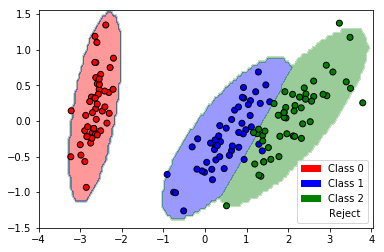

In [338]:
#Classificate using discriminant g_i(x)

xx, yy = np.meshgrid(np.arange(-4.0, 4.1, 0.05),
                     np.arange(-1.5, 1.6, 0.05))

L = 0.99
m,n = xx.shape
Z = np.zeros(xx.shape)
da = np.ones(shape=(3))
p_0 = prob_estimator(0, data)
p_1 = prob_estimator(1, data)
p_2 = prob_estimator(2, data)
for i in range(0,m):
    for j in range(0,n):
        da[0] = np.exp(discriminant_diff_covariance([xx[i,j], yy[i, j]],0, data, p_0, params0) - np.log(2.0*np.pi))
        da[1] = np.exp(discriminant_diff_covariance([xx[i,j], yy[i, j]],1, data, p_1, params1) - np.log(2.0*np.pi))
        da[2] = np.exp(discriminant_diff_covariance([xx[i,j], yy[i, j]],2, data, p_2, params2) - np.log(2.0*np.pi))
        suma = np.sum(da)
        #Normalize or not???
        #da = da / suma 
        possibleClass = np.argmax(da)
        possibleValue = da[possibleClass]    
        if possibleValue > 1.0 - L:
            Z[i,j] = possibleClass
        else:
            Z[i,j] = 3
            
plt.contourf(xx, yy, Z, alpha=0.4, levels = [0,0.9,1.9,2.9,3.9],  colors=("r","b","g","w"))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=[colors[i] for i in y], edgecolor='k')
proxy = [plt.Rectangle((0,0),1,1,fc = pc) for pc in colors]

plt.legend(proxy, ["Class 0", "Class 1", "Class 2", "Reject"])

plt.show()
    


### (b)
Classify the rest of the dataset that was not used for estimation (20%), using a classifier based on the discriminant functions. Evaluate the results using a confusion matrix.

In [339]:
numberclass = len(data)
split = 0.8
L = 0.9
totalsamples = 0.0
correctsamples = 0.0
for i in range(0,numberclass):
    split_data = {}
    m,n = data[i].shape
    split_data[i] = data[i][int(m * split):,:] 
    m1,n1 = split_data[i].shape    
    correct = 0.0
    for j in range(0,m1):
        result = gaussian_classificator(L, data, split_data[i][j], split = 0.8)
        correct = correct + 1 if result == i else correct
    correctsamples += correct
    totalsamples += m1
    print "Percent of correct:", correct/m1, "Correct samples", correct, "Total test samples:", m1, "for class", i
    
print "Percent of total correct:", correctsamples/totalsamples, "Correct samples", correctsamples, "Total test samples:", totalsamples



Percent of correct: 0.8 Correct samples 8.0 Total test samples: 10 for class 0
Percent of correct: 0.8 Correct samples 8.0 Total test samples: 10 for class 1
Percent of correct: 0.9 Correct samples 9.0 Total test samples: 10 for class 2
Percent of total correct: 0.833333333333 Correct samples 25.0 Total test samples: 30.0
